In [11]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from liver_functions import import_data
from liver_functions import one_hot_encode
from liver_functions import split_data

def build_pipeline(classifier, isScaled):
    if isScaled:
        pipe = Pipeline(steps=[("imputer", SimpleImputer()),
                               ("scale", StandardScaler()),
                               ("clf", classifier)])
    else:
        pipe = Pipeline(steps=[("imputer", SimpleImputer()),
                               ("clf", classifier)])
        
    return pipe
    
def run_gridsearch(pipe, param_grid, num_folds, metric, X_train, y_train):
    search = GridSearchCV(pipe, param_grid, cv=num_folds, scoring=metric)
    search.fit(X_train, y_train)
    
    return search.best_params_, search.best_score_

    
# Example
df = import_data("Indian Liver Patient Dataset (ILPD).csv")
df = one_hot_encode(df, "gender")
X_train, y_train, X_test, y_test = split_data(df, 0.2, "is_patient")
pipe = build_pipeline(KNeighborsClassifier(), True)
param_grid = dict(clf__n_neighbors=list(range(1,10)))
run_gridsearch(pipe, param_grid, 10, "f1", X_train, y_train)


/Users/mchifala/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'clf__n_neighbors': 2}, 0.8144125237443208)

In [653]:
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [607]:
import unittest
import numpy as np
import pandas as pd
import string
import random

from liver_functions import import_data
from liver_functions import one_hot_encode
from liver_functions import split_data

class TestFunctions(unittest.TestCase):
    
    def make_char_df(self):
        n = 100
        data = np.random.choice(list(string.ascii_lowercase),
                                     size=(n,n))
        np.savetxt("test_data.csv", data, fmt= "%c", delimiter=",")
        return data
    
    def make_gender_df(self):
        n = 50
        gender = [random.choice(["Male", "Female"]) for i in range(n)]
        df = pd.DataFrame(gender, columns=["gender"])
        return df
    
    def test_one_hot(self):
        df = self.make_gender_df()
        df_enc = df.copy()
        df_enc["Male"] = df_enc["gender"].apply(lambda x: 1 if x == "Male" else 0)
        df_enc["Female"] = df_enc["gender"].apply(lambda x: 1 if x == "Female" else 0)
        df_enc.drop(columns = ["gender"],  inplace = True)
        pd.testing.assert_frame_equal(df_enc, one_hot_encode(df),
                                      check_like = True, 
                                      check_dtype = False)
    """"
    def test_data_import(self):
        data = self.make_char_df()
        df = pd.DataFrame(data, columns= [x for x in data[0,:]])
        df = df.reindex(df.index.drop(0)).reset_index(drop=True)
        df_import = import_data("test_data.csv")
        pd.testing.assert_frame_equal(df, df_import, check_less_precise = 0) 
    """   
    def test_split(self):
        percent = 0.2
        data = self.make_char_df()
        n = len(data)
        df = pd.DataFrame(data, columns = [str(x) for x in range(n)])
        X_train, y_train, X_test, y_test = split_data(df, percent, str(n-1))
        
        self.assertEqual(np.shape(X_train), (round((1-percent)*n), n-1))
        self.assertEqual(np.shape(X_test), (round((percent)*n), n-1))
        self.assertEqual(np.shape(y_train), (round((1-percent)*n), ))
        self.assertEqual(np.shape(y_test), (round((percent)*n), ))
                                   
if __name__ == '__main__':        
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.013s

OK


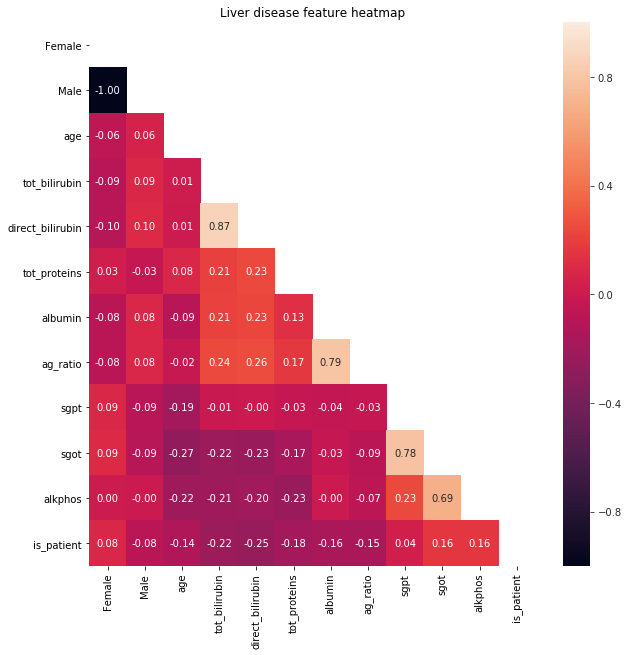

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def make_correlation_heatmap(df, outfile):
    df_corr = df.corr()
    plt.figure(figsize=(10, 10))
    plt.title("Liver disease feature heatmap")
    mask = np.zeros_like(df_corr)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax = sns.heatmap(df_corr, fmt=".2f", mask=mask, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.savefig(outfile)
    
make_correlation_heatmap(df)

In [ ]:
plt.figure(figsize  = (10,10))

sns.pairplot(df, kind="reg", hue="is_patient")
plt.show()